In [219]:
using CSV, Plots, Random, LinearAlgebra, Statistics, DataFrames, ARFIMA, GLM, RDatasets

┌ Info: Precompiling RDatasets [ce6b1742-4840-55fa-b093-852dadbb1d8b]
└ @ Base loading.jl:1278


In [188]:
using SparseArrays
include("proxgrad.jl")

proxgrad_const

In [300]:
sentiment = CSV.read("sentiment3.csv")

,TotalSentimentScore,Vaccine,Death,Shut,Spread,Date,Death_Count_Day,Positive_Count_Day
,Float64,Int64,Int64,Int64,Int64,String,Int64,Int64
1,0.0858615,0,0,0,0,02/11/20,0,0
2,-0.0980214,2,3,1,1,02/12/20,0,0
3,-0.0931667,0,3,0,0,02/13/20,0,0
4,0.00919,0,1,2,1,02/14/20,0,0
5,0.0,1,0,0,0,02/15/20,0,0
6,-0.1998,0,0,1,0,02/16/20,0,0
7,-0.190725,1,0,0,0,02/17/20,0,0
8,-0.0343133,0,2,0,1,02/18/20,0,0
9,-0.144262,0,0,0,1,02/19/20,0,0


In [301]:
sentiment = [sentiment[1:5] sentiment[7:8]]
sentiment = convert(Matrix, sentiment)

263×7 Array{Float64,2}:
  0.0858615   0.0   0.0  0.0  0.0       0.0  0.0
 -0.0980214   2.0   3.0  1.0  1.0       0.0  0.0
 -0.0931667   0.0   3.0  0.0  0.0       0.0  0.0
  0.00919     0.0   1.0  2.0  1.0       0.0  0.0
  0.0         1.0   0.0  0.0  0.0       0.0  0.0
 -0.1998      0.0   0.0  1.0  0.0       0.0  0.0
 -0.190725    1.0   0.0  0.0  0.0       0.0  0.0
 -0.0343133   0.0   2.0  0.0  1.0       0.0  0.0
 -0.144262    0.0   0.0  0.0  1.0       0.0  0.0
 -0.0162727   0.0   1.0  0.0  2.0       0.0  0.0
 -0.1702      0.0   0.0  0.0  0.0       0.0  0.0
 -0.0222375   3.0   1.0  1.0  0.0       0.0  0.0
  0.0131182   0.0   0.0  0.0  0.0       0.0  0.0
  ⋮                                     ⋮    
  0.0781188   0.0   1.0  7.0  1.0  211959.0  8.13394e6
 -0.0074186   5.0   2.0  4.0  0.0  212796.0  8.19449e6
 -0.0994814  16.0  17.0  0.0  4.0  213815.0  8.25545e6
  0.0726509   4.0   1.0  3.0  3.0  214941.0  8.32829e6
 -0.0800933   4.0   7.0  3.0  1.0  215875.0  8.41062e6
 -0.0457233   1.0 

In [302]:
mean(sentiment[:,7])

3.204601133079848e6

In [303]:
function standarize(stock)
    return (stock .- mean(stock))/sqrt(var(stock))
end

standarize (generic function with 1 method)

In [304]:
for i in [1:7]
    sentiment[:,i] = standarize(sentiment[:,i])
end

In [305]:
sentiment

263×7 Array{Float64,2}:
 -0.308611  -0.308611  -0.308611  -0.308611  -0.308611  -0.308611  -0.308611
 -0.308611  -0.30861   -0.308609  -0.30861   -0.30861   -0.308611  -0.308611
 -0.308611  -0.308611  -0.308609  -0.308611  -0.308611  -0.308611  -0.308611
 -0.308611  -0.308611  -0.30861   -0.30861   -0.30861   -0.308611  -0.308611
 -0.308611  -0.30861   -0.308611  -0.308611  -0.308611  -0.308611  -0.308611
 -0.308611  -0.308611  -0.308611  -0.30861   -0.308611  -0.308611  -0.308611
 -0.308611  -0.30861   -0.308611  -0.308611  -0.308611  -0.308611  -0.308611
 -0.308611  -0.308611  -0.30861   -0.308611  -0.30861   -0.308611  -0.308611
 -0.308611  -0.308611  -0.308611  -0.308611  -0.30861   -0.308611  -0.308611
 -0.308611  -0.308611  -0.30861   -0.308611  -0.30861   -0.308611  -0.308611
 -0.308611  -0.308611  -0.308611  -0.308611  -0.308611  -0.308611  -0.308611
 -0.308611  -0.308609  -0.30861   -0.30861   -0.308611  -0.308611  -0.308611
 -0.308611  -0.308611  -0.308611  -0.308611  -0.3086

In [306]:
Anthem = CSV.read("Anthem.csv",header = false)
Cardinal = CSV.read("Cardinal.csv",header = false)
Cigna = CSV.read("Cigna.csv",header = false)
CVS = CSV.read("CVS.csv",header = false)
Gilead = CSV.read("Gilead.csv",header = false)
McKesson = CSV.read("McKesson.csv",header = false)
Moderna = CSV.read("Moderna.csv",header = false)
Pfizer = CSV.read("Pfizer.csv",header = false)
United = CSV.read("United.csv",header = false)
Johnson = CSV.read("Johnson.csv",header = false)

thread = 1 warning: only found 8 / 9 columns around data row: 263. Filling remaining columns with `missing`


,Column1
,Float64
1,151.99
2,151.09
3,150.09
4,150.13
5,150.378
6,150.625
7,150.873
8,149.14
9,148.94


In [307]:
mean1 = mean(Anthem[1])
std1 = sqrt(var(Anthem[1]))
Anthem[1] = standarize(Anthem[1])

263-element Array{Float64,1}:
 0.4943417591032025
 1.201352670533797
 1.3274631916769508
 1.281325643049144
 1.3321874362463035
 1.3830492250493596
 1.4339110182465167
 1.4847728070495727
 1.5555172416193819
 1.110834247563076
 1.1446683532198791
 0.8925934719639846
 0.6405185951021938
 ⋮
 1.0348157915053524
 0.9899964296770966
 1.208383410247626
 1.6042924381360009
 1.8499226343066102
 1.6886589287043028
 1.5273952187078943
 1.366131513105587
 1.3279030413340542
 0.7531536914462311
 0.20213420858870998
 0.18192037053069232

In [308]:
function abs_err(y,pred)
    return mean(abs.(y-pred))
end

abs_err (generic function with 1 method)

In [309]:
function analysis(stock, sentiment)
    # index for 5-fold
    split = [43,43 + 44,43+ 44*2,43 + 44*3, 43 + 44*4,43 + 44*5]
    num_of_model = 3
    mse = zeros(num_of_model,5)
    w = zeros(18)
    for i in 1:5
        w_set = []
        # setting train and validation set
        split_cur = split[i]
        split2 = Int(round(split_cur*4/5))

        stock_train = stock[1][1:split2]
        stock_val = stock[1][split2 + 1:split_cur]

        sent_train = sentiment[1][1:split2]
        sent_val = sentiment[1][split2 + 1:split_cur]

        death_train = sentiment[3][1:split2]
        death_val = sentiment[3][split2 + 1:split_cur]

        vac_train = sentiment[2][1:split2]
        vac_val = sentiment[2][split2 + 1:split_cur]

        shut_train = sentiment[4][1:split2]
        shut_val = sentiment[4][split2 + 1:split_cur]

        #Naive Model, w[1:5]
        Xtrain = [sent_train death_train vac_train shut_train ones(length(sent_train))]
        Xval = [sent_val death_val vac_val shut_val ones(length(sent_val))]
        Ytrain = stock_train
        Yval = stock_val

        w_cur = Xtrain\Ytrain
        w_set = vcat(w_set, w_cur)
        pred = Xval*w_cur
        mse[1,i] = abs_err(Yval,pred)

        #AR1 Model, w[6:11]
        Xtrain = [sent_train[2:end] stock_train[1:end-1] death_train[2:end] vac_train[2:end] shut_train[2:end] ones(length(sent_train)-1)]
        Xval = [sent_val[2:end] stock_val[1:end-1] death_val[2:end] vac_val[2:end] shut_val[2:end] ones(length(sent_val)-1)]
        Ytrain = stock_train[2:end]
        Yval = stock_val[2:end]

        w_cur = Xtrain\Ytrain
        w_set = vcat(w_set, w_cur)
        pred = Xval*w_cur
        mse[2,i] = abs_err(Yval,pred)

        # AR2 Model, w[12:18]
        Xtrain = [sent_train[3:end] stock_train[2:end-1] stock_train[1:end-2] death_train[3:end] vac_train[3:end] shut_train[3:end] ones(length(sent_train)-2)]
        Xval = [sent_val[3:end] stock_val[2:end-1] stock_val[1:end-2] death_val[3:end] vac_val[3:end] shut_val[3:end] ones(length(sent_val)-2)]
        Ytrain = stock_train[3:end]
        Yval = stock_val[3:end]

        w_cur = Xtrain\Ytrain
        w_set = vcat(w_set, w_cur)
        pred = Xval*w_cur
        mse[3,i] = abs_err(Yval,pred)
        w = hcat(w,w_set)
    end
    w = w[:,2:6]
    
    avg_mse = mean(mse, dims=2)
    
    final_model = findmin(avg_mse)[2][1]
    test_mse = zeros(5)
    model = ["model 1", "model 2", "model 3"]
    model_length = [5, 6, 7]
    fig = plot(linestyle = :dot, title = "Test predictions from 9/17 to 10/30")
    w_test = zeros(model_length[final_model])
    for i in 1:5
        #Fixed index
        stock_train = stock[1][1:split[i]]
        sent_train = sentiment[1][1:split[i]]
        death_train = sentiment[3][1:split[i]]
        vac_train = sentiment[2][1:split[i]]
        shut_train = sentiment[4][1:split[i]]

        stock_test = stock[1][split[i]+1:split[i+1]]
        sent_test = sentiment[1][split[i]+1:split[i+1]]
        death_test = sentiment[3][split[i]+1:split[i+1]]
        vac_test = sentiment[2][split[i]+1:split[i+1]]
        shut_test = sentiment[4][split[i]+1:split[i+1]]

        if final_model == 1
            Xtrain = [sent_train death_train vac_train shut_train ones(length(sent_train))]
            Xtest = [sent_test death_test vac_test shut_test ones(length(sent_test))]
            Ytrain = stock_train
            Ytest = stock_test

            w_cur = Xtrain\Ytrain
            w_test = hcat(w_test, w_cur)
            pred = Xtest*w_cur
            test_mse[i] = abs_err(Ytest,pred)
            #plot
            if i == 5
                date = [1:44]
                plot!(date, Ytest, color = :red,  label = "Actual Stock Price")
                plot!(date, pred, color = :blue, label = "Naive Model")
            end

        elseif final_model == 2
            Xtrain = [sent_train[2:end] stock_train[1:end-1] death_train[2:end] vac_train[2:end] shut_train[2:end] ones(length(stock_train)-1)]
            Xtest = [sent_test[2:end] stock_test[1:end-1] death_test[2:end] vac_test[2:end] shut_test[2:end] ones(length(stock_test)-1)]
            Ytrain = stock_train[2:end]
            Ytest = stock_test[2:end]

            w_cur = Xtrain\Ytrain
            w_test = hcat(w_test, w_cur)
            pred = Xtest*w_cur
            test_mse[i] = abs_err(Ytest,pred)
            #plot
            if i == 5
                date = [2:44]
                plot!(date, Ytest, color = :red,  label = "Actual Stock Price")
                plot!(date, pred, color = :blue, label = "AR1 Model")
            end

        elseif final_model == 3
            Xtrain = [sent_train[3:end] stock_train[2:end-1] stock_train[1:end-2] death_train[3:end] vac_train[3:end] shut_train[3:end] ones(length(sent_train)-2)]
            Xtest = [sent_test[3:end] stock_test[2:end-1] stock_test[1:end-2] death_test[3:end] vac_test[3:end] shut_test[3:end] ones(length(stock_test)-2)]
            Ytrain = stock_train[3:end]
            Ytest = stock_test[3:end]

            w_cur = Xtrain\Ytrain
            w_test = hcat(w_test, w_cur)
            pred = Xtest*w_cur
            test_mse[i] = abs_err(Ytest,pred) 
            #plot
            if i == 5
                date = [3:44]
                plot!(date, Ytest, color = :red, label = "Actual Stock Price")
                plot!(date, pred, color = :blue, label = "AR2 Model")
            end
        else
            print("error")
        end  
    end
    w_test = w_test[:,2:6]
    display(fig)
    print("Selected: ", model[final_model], ", estimated error is: ",mean(test_mse), ", Validation Error is :", findmin(avg_mse)[1])
end

analysis (generic function with 1 method)

In [314]:
stock_test

44-element Array{Float64,1}:
 -0.2487011440979554
 -0.19641123683979164
 -0.29132401274293424
 -0.38623678425197333
 -0.48114956015511595
 -0.9324234003271205
 -1.0075628161860044
 -0.8735425590712077
 -0.5892440854129881
 -0.5627330283485309
 -0.5362219756781771
 -0.5097109186137199
 -0.38975143787018557
  ⋮
  1.0348157915053524
  0.9899964296770966
  1.208383410247626
  1.6042924381360009
  1.8499226343066102
  1.6886589287043028
  1.5273952187078943
  1.366131513105587
  1.3279030413340542
  0.7531536914462311
  0.20213420858870998
  0.18192037053069232

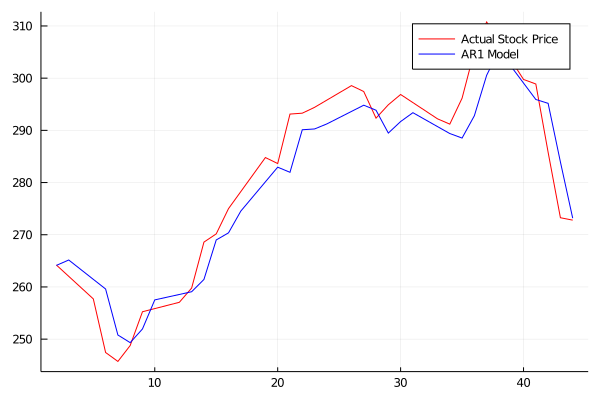

In [327]:
#analysis(Anthem, sentiment)
#Quad loss with Quad reg
i = 5
stock = Anthem
stock_train = stock[1][1:split[i]]
sent_train = sentiment[1:split[i],1]
death_train = sentiment[1:split[i],3]
vac_train = sentiment[1:split[i],2]
shut_train = sentiment[1:split[i],4]
spred_train = sentiment[1:split[i],5]
death_train = sentiment[1:split[i],6]
pos_train = sentiment[1:split[i],7]

stock_test = stock[1][split[i]+1:split[i+1]]
sent_test = sentiment[split[i]+1:split[i+1],1]
death_test = sentiment[split[i]+1:split[i+1],3]
vac_test = sentiment[split[i]+1:split[i+1],2]
shut_test = sentiment[split[i]+1:split[i+1],4]
spred_test = sentiment[split[i]+1:split[i+1],5]
death_test = sentiment[split[i]+1:split[i+1],6]
pos_test = sentiment[split[i]+1:split[i+1],7]

Xtrain = [sent_train[2:end] stock_train[1:end-1] death_train[2:end] vac_train[2:end] shut_train[2:end] spred_train[2:end] death_train[2:end] ones(length(stock_train)-1)]
Xtest = [sent_test[2:end] stock_test[1:end-1] death_test[2:end] vac_test[2:end] shut_test[2:end] spred_test[2:end] seven_test[2:end] ones(length(stock_test)-1)]
Ytrain = stock_train[2:end]
Ytest = stock_test[2:end]
n = length(Ytrain)
loss = 1/n*QuadLoss()

# we form λ|| ⋅ ||^2 by multiplying the QuadReg() function by λ
λ = .1
reg = λ*QuadReg()

w_cur = proxgrad(loss, reg, Xtrain, Ytrain, maxiters=1000)

pred = Xtest*w_cur

date = [2:44]

Ytest = Ytest.*std1 .+ mean1
pred = pred.*std1 .+ mean1
plot(date, Ytest, color = :red,  label = "Actual Stock Price")
plot!(date, pred, color = :blue, label = "AR1 Model")


In [321]:
abs_err(Ytest,pred)

4.064729959833931

In [322]:
w_cur

8-element Array{Float64,1}:
  0.0014823834709458007
  0.8592077077612814
  0.022159861729165488
  0.0014824780029772885
  0.0014808210947361393
  0.0014808131249118633
  0.022159861729165488
 -0.004803447925594666

In [323]:
MA_Anthem = []
for i in 5:263
    MA_Anthem = vcat(MA_Anthem, sum(Anthem[1][i-4:i])/5)
end
MA_Anthem = convert(Array{Float64,1}, MA_Anthem)

259-element Array{Float64,1}:
 1.1273341401218795
 1.305075633311111
 1.351587302853655
 1.3830492259281792
 1.4378875456422269
 1.3936169079055816
 1.3459407335396854
 1.2376772242831788
 1.0688263818937032
 0.8354116763390864
 0.602172647001164
 0.36875795023475244
 0.09532752182227693
 ⋮
 1.1403622294709241
 1.1077580594596919
 1.1015185130481513
 1.188111795893891
 1.3374821407745372
 1.4682507682143275
 1.575730526020487
 1.607280146592079
 1.5520022672316898
 1.3326484786596138
 1.0353435346364954
 0.7662485650010549

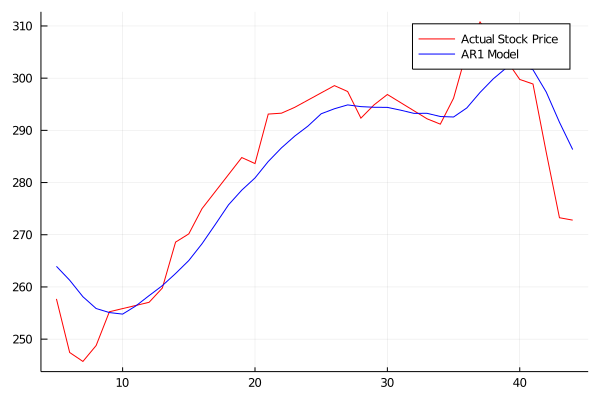

In [334]:
i = 5
stock = Anthem
stock_train = stock[1][1:split[i]]
sent_train = sentiment[1:split[i],1]
death_train = sentiment[1:split[i],3]
vac_train = sentiment[1:split[i],2]
shut_train = sentiment[1:split[i],4]
spred_train = sentiment[1:split[i],5]
death_train = sentiment[1:split[i],6]
pos_train = sentiment[1:split[i],7]
MA_Anthem_train = MA_Anthem[1:split[i]-4]

stock_test = stock[1][split[i]+1:split[i+1]]
sent_test = sentiment[split[i]+1:split[i+1],1]
death_test = sentiment[split[i]+1:split[i+1],3]
vac_test = sentiment[split[i]+1:split[i+1],2]
shut_test = sentiment[split[i]+1:split[i+1],4]
spred_test = sentiment[split[i]+1:split[i+1],5]
death_test = sentiment[split[i]+1:split[i+1],6]
pos_test = sentiment[split[i]+1:split[i+1],7]
MA_Anthem_test = MA_Anthem[split[i]-4:split[i+1]-4]

Xtrain = [sent_train[5:end] MA_Anthem_train death_train[5:end] vac_train[5:end] shut_train[5:end] spred_train[5:end] death_train[5:end] pos_train[5:end] ones(length(sent_train[5:end]))]
Xtest = [sent_test[5:end] MA_Anthem_test[6:end] death_test[5:end] vac_test[5:end] shut_test[5:end] spred_test[5:end] death_test[5:end] pos_test[5:end] ones(length(sent_test[5:end]))]
Ytrain = stock_train[5:end]
Ytest = stock_test[5:end]

n = length(Ytrain)
loss = 1/n*QuadLoss()

# we form λ|| ⋅ ||^2 by multiplying the QuadReg() function by λ
λ = .1
reg = λ*QuadReg()

w_cur = proxgrad(loss, reg, Xtrain, Ytrain, maxiters=1000)

pred = Xtest*w_cur

date = [5:44]
Ytest = Ytest.*std1 .+ mean1
pred = pred.*std1 .+ mean1
plot(date, Ytest, color = :red,  label = "Actual Stock Price")
plot!(date, pred, color = :blue, label = "AR1 Model")


In [335]:
abs_err(Ytest,pred)

5.349807739170286

In [336]:
w_cur

9-element Array{Float64,1}:
  0.012245082538923032
  0.8619410129454549
  0.019881294858874424
  0.012244770215173914
  0.012243940058753178
  0.012243506494713563
  0.019881294858874424
  0.03195144085240903
 -0.03967808728310801

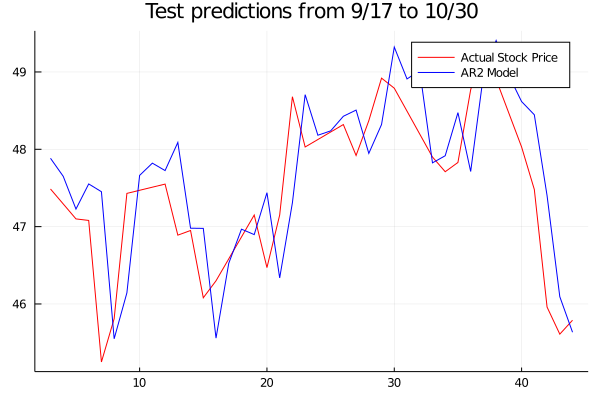

Selected: model 3, estimated error is: 0.9105555305797374, Validation Error is :0.9886927499833214

In [171]:
analysis(Cardinal, sentiment)

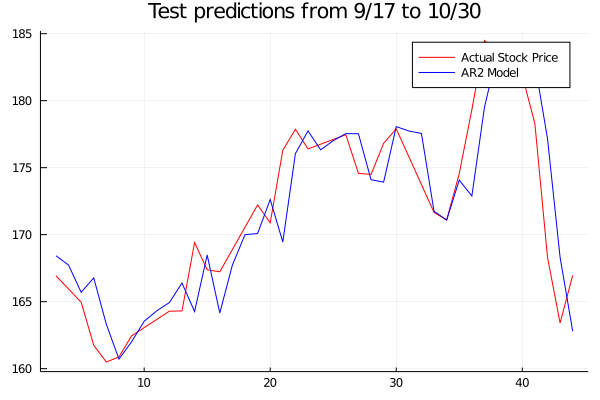

Selected: model 3, estimated error is: 3.231777300711547, Validation Error is :4.3809369630816475

In [172]:
analysis(Cigna, sentiment)

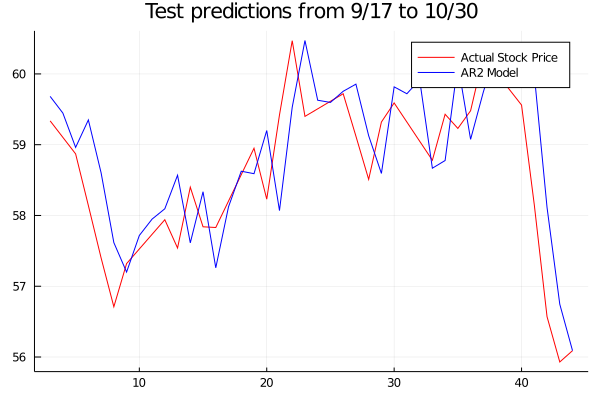

Selected: model 3, estimated error is: 0.9442286344862815, Validation Error is :1.0686221629300268

In [173]:
analysis(CVS, sentiment)

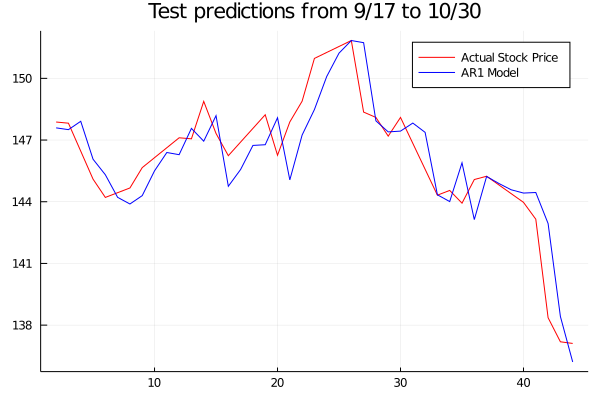

Selected: model 2, estimated error is: 2.010509678994439, Validation Error is :2.3448974211882216

In [174]:
analysis(Johnson, sentiment)

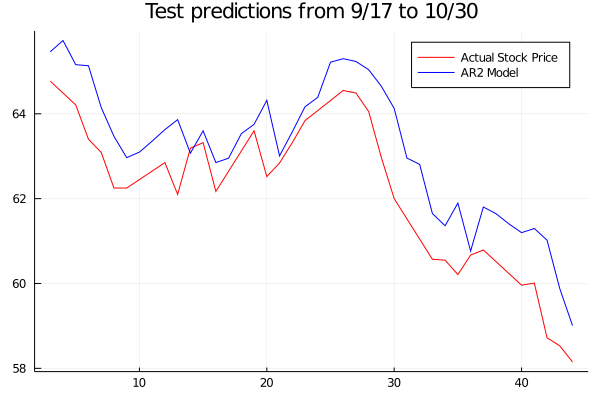

Selected: model 3, estimated error is: 1.2500094892400604, Validation Error is :1.519994378699058

In [175]:
analysis(Gilead, sentiment)

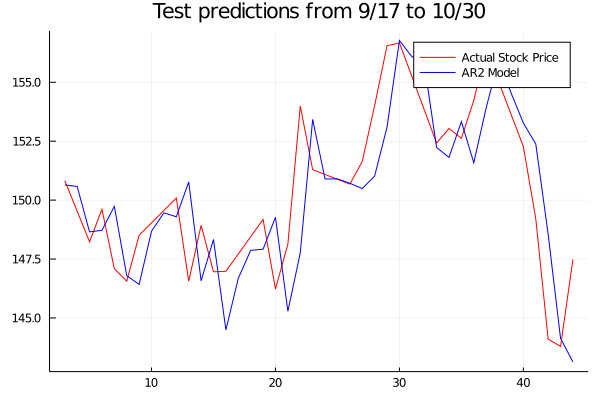

Selected: model 3, estimated error is: 2.3983681601998135, Validation Error is :2.575233624475387

In [176]:
analysis(McKesson, sentiment)

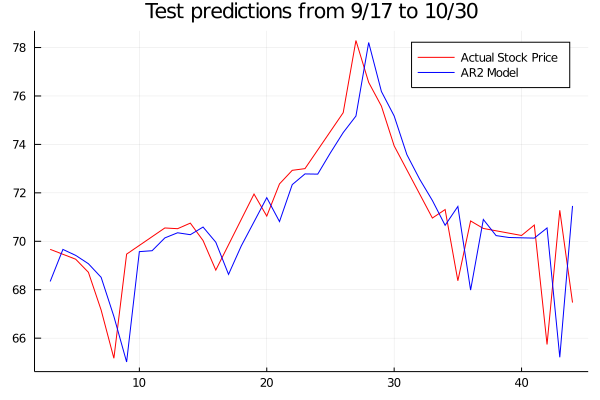

Selected: model 3, estimated error is: 2.1443571093345257, Validation Error is :1.9056537154654856

In [177]:
analysis(Moderna, sentiment)

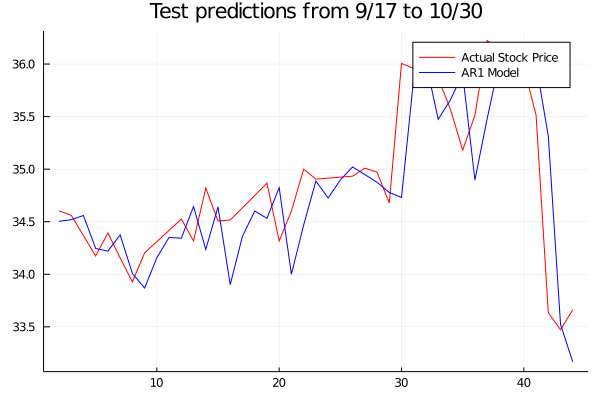

Selected: model 2, estimated error is: 0.6229715846638244, Validation Error is :0.6462306311097439

In [178]:
analysis(Pfizer, sentiment)

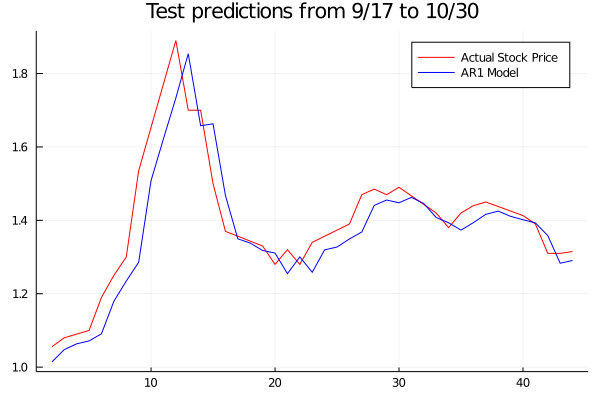

Selected: model 2, estimated error is: 0.029183860910923655, Validation Error is :0.02860916423932695

In [179]:
analysis(United, sentiment)